## Вариант 4

$E\bar\theta_n = E2 \bar x = \frac {2} {n} \sum_i^n x_i = 2Ex_1 = 2 * \frac {\theta} {2} = \theta \Longrightarrow $ оценка несмещена

Theta


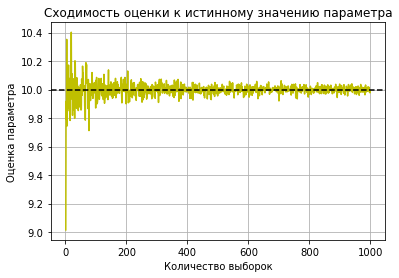

In [40]:
import numpy as np
import matplotlib.pyplot as plt


# Задаем истинное значение параметра
theta_0 = 10

# Задаем количество выборок
n_values = [i for i in range(1, 1000)]

# Создаем список для хранения оценок
theta_n_values = []

# Генерируем выборки и вычисляем оценки для каждого значения n
for n in range(1,1000):
    res = []
    for _ in range(100):
        x = np.random.uniform(0, theta_0, n) # Генерируем выборку
        theta_n = 2 * np.mean(x) # Вычисляем оценку
        res.append(theta_n)
    theta_n_values.append(np.mean(res))
    
# Строим график
plt.plot(n_values, theta_n_values, color='y')
plt.axhline(y=theta_0, color='black', linestyle='--') # Горизонтальная линия со значением истинного параметра
plt.xlabel('Количество выборок')
plt.ylabel('Оценка параметра')
plt.title('Сходимость оценки к истинному значению параметра')
plt.grid(True)
plt.show()

Из графика видим, что оценка параметра сходится к истинному значению параметра. С увеличением количества выборок, дисперсия случайной величины уменьшается со скоростью сходимости у оценки

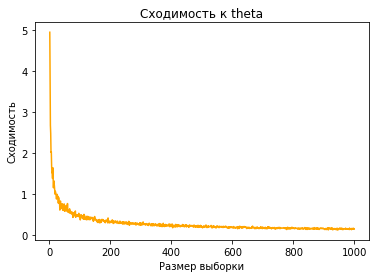

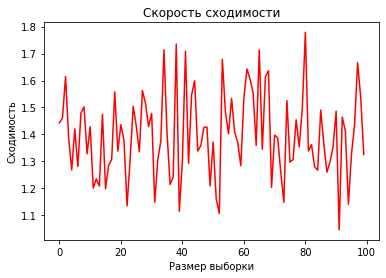

Optimize_mean = 1.3965664689831698


In [71]:
from scipy.interpolate import make_interp_spline, BSpline
max_size = 1000 
n_values = [i for i in range(1, 1000)]
convergence = []


for n in range(1, 1000):
    res = []
    for _ in range(100):  # Количество экспериментов для усреднения
        x = np.random.uniform(0, theta_0, n)
        theta = 2 * np.mean(x)
        res.append(np.abs(theta - theta_0))
    convergence.append(np.mean(res))

plt.plot(n_values, convergence, color='orange')
plt.xlabel('Размер выборки')
plt.ylabel('Сходимость')
plt.title('Сходимость к theta')
plt.show()

speed = []
for i in np.arange(1,1000 // 2 - 1, 5):
    # смотрим долю сходимости элементов из первой половины выборки с элементами второй половины
    speed.append(convergence[i] / convergence[2 * i])
    
z = len(speed)
y = np.array(speed[:])
x = np.array([i for i in range(z)])

xnew = np.linspace (x.min(), x.max(), z) 

spl = make_interp_spline (x, y, k=3)
y_smooth = spl (xnew)

plt.plot (xnew, y_smooth, color='red')
plt.xlabel('Выборка')
plt.ylabel('Доля сходимости')
plt.title('Скорость сходимости')
plt.show()
print(f'Optimize_mean = {np.mean(speed)}')

В среднем, при выборке большей в 2 раза, наблюдается улучшение предсказания ~1.4 раза, что значит, что скорость сходимости эквивалентна $ \frac {1} {n} $